In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing

In [2]:
dataset=pd.read_csv("../data/train.csv")
dataset.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [4]:
label_encoder = preprocessing.LabelEncoder() 
dataset['label']= label_encoder.fit_transform(dataset['label'])
dataset['label'].unique()

array([1, 0])

In [5]:
dataset['label'] = dataset['label'].astype(int)

In [6]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
Y=Y.astype(int)
Y

array([1, 0, 1, ..., 0, 1, 1])

In [7]:
len(Y)

20800

In [8]:
i=0
dataset1=[]
while i< len(Y):
    if Y[i]==0:
        dataset1.append(X[i])
    i=i+1  
    
dataset1[1]


array([5,
       'Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart',
       'Daniel Nussbaum',
       'In these trying times, Jackie Mason is the Voice of Reason. [In this week’s exclusive clip for Breitbart News, Jackie discusses the looming threat of North Korea, and explains how President Donald Trump could win the support of the Hollywood left if the U. S. needs to strike first.  “If he decides to bomb them, the whole country will be behind him, because everybody will realize he had no choice and that was the only thing to do,” Jackie says. “Except the Hollywood left. They’ll get nauseous. ” “[Trump] could win the left over, they’ll fall in love with him in a minute. If he bombed them for a better reason,” Jackie explains. “Like if they have no transgender toilets. ” Jackie also says it’s no surprise that Hollywood celebrities didn’t support Trump’s strike on a Syrian airfield this month. “They were infuria

In [9]:
kaggle_features=pd.read_csv("../data/kaggle_features/kaggle_features1.csv")
kaggle_features

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,...,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity
0,0,2.833213,6.742881,0.426887,0.520047,0.338443,8.289037,0.482216,0.006777,0.024764,...,0.552632,0.447368,0.291412,0.050000,0.700000,-0.409314,-0.050000,-1.000000,0.000000,0.000000
1,1,2.197225,6.561031,0.521924,0.534653,0.417256,8.106515,0.495110,0.100880,0.032532,...,0.638889,0.361111,0.365758,0.062500,0.800000,-0.239744,-0.050000,-0.666667,0.100000,0.000000
2,2,2.079442,7.150701,0.443922,0.549804,0.381961,8.728426,0.405107,0.056258,0.032157,...,0.640625,0.359375,0.323984,0.033333,0.600000,-0.273973,-0.050000,-0.700000,0.000000,0.000000
3,3,2.397895,6.331502,0.444840,0.565836,0.352313,7.864804,0.262625,0.017497,0.021352,...,0.387097,0.612903,0.348611,0.100000,0.550000,-0.172682,-0.071429,-0.300000,0.107143,-0.135714
4,4,2.708050,5.030438,0.640523,0.581699,0.470588,6.626718,0.112500,-0.012500,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,-0.050000,-0.050000,-0.050000,0.250000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20795,20795,2.397895,5.739793,0.601286,0.572347,0.469453,7.264730,0.442076,0.018638,0.016077,...,0.500000,0.500000,0.442143,0.285714,0.700000,-0.262500,-0.166667,-0.500000,0.000000,0.000000
20796,20796,2.564949,7.024649,0.349644,0.543594,0.292705,8.451694,0.413826,0.050297,0.024911,...,0.538462,0.461538,0.371519,0.062500,0.800000,-0.290856,-0.050000,-0.700000,0.454545,0.136364
20797,20797,2.833213,6.723832,0.462740,0.562500,0.388221,8.248791,0.466389,0.112540,0.036058,...,0.750000,0.250000,0.303730,0.100000,0.800000,-0.246389,-0.100000,-0.500000,0.454545,0.136364
20798,20798,2.197225,5.620401,0.590580,0.648551,0.467391,7.284135,0.209632,-0.019426,0.007246,...,0.200000,0.800000,0.323810,0.214286,0.433333,-0.134375,-0.100000,-0.250000,0.000000,0.000000


In [10]:
kaggle_features=kaggle_features.dropna()
kaggle_features

,id,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,average_token_length,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,...,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity
0,0,2.833213,6.742881,0.426887,0.520047,0.338443,8.289037,0.482216,0.006777,0.024764,...,0.552632,0.447368,0.291412,0.050000,0.700000,-0.409314,-0.050000,-1.000000,0.000000,0.000000
1,1,2.197225,6.561031,0.521924,0.534653,0.417256,8.106515,0.495110,0.100880,0.032532,...,0.638889,0.361111,0.365758,0.062500,0.800000,-0.239744,-0.050000,-0.666667,0.100000,0.000000
2,2,2.079442,7.150701,0.443922,0.549804,0.381961,8.728426,0.405107,0.056258,0.032157,...,0.640625,0.359375,0.323984,0.033333,0.600000,-0.273973,-0.050000,-0.700000,0.000000,0.000000
3,3,2.397895,6.331502,0.444840,0.565836,0.352313,7.864804,0.262625,0.017497,0.021352,...,0.387097,0.612903,0.348611,0.100000,0.550000,-0.172682,-0.071429,-0.300000,0.107143,-0.135714
4,4,2.708050,5.030438,0.640523,0.581699,0.470588,6.626718,0.112500,-0.012500,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,-0.050000,-0.050000,-0.050000,0.250000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20795,20795,2.397895,5.739793,0.601286,0.572347,0.469453,7.264730,0.442076,0.018638,0.016077,...,0.500000,0.500000,0.442143,0.285714,0.700000,-0.262500,-0.166667,-0.500000,0.000000,0.000000
20796,20796,2.564949,7.024649,0.349644,0.543594,0.292705,8.451694,0.413826,0.050297,0.024911,...,0.538462,0.461538,0.371519,0.062500,0.800000,-0.290856,-0.050000,-0.700000,0.454545,0.136364
20797,20797,2.833213,6.723832,0.462740,0.562500,0.388221,8.248791,0.466389,0.112540,0.036058,...,0.750000,0.250000,0.303730,0.100000,0.800000,-0.246389,-0.100000,-0.500000,0.454545,0.136364
20798,20798,2.197225,5.620401,0.590580,0.648551,0.467391,7.284135,0.209632,-0.019426,0.007246,...,0.200000,0.800000,0.323810,0.214286,0.433333,-0.134375,-0.100000,-0.250000,0.000000,0.000000


In [11]:
dataset_merged=pd.merge(dataset, kaggle_features, on='id')
dataset_merged_new=pd.merge(dataset, kaggle_features, on='id')
dataset_merged.head()

,id,title,author,text,label,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,...,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,2.833213,6.742881,0.426887,0.520047,0.338443,...,0.552632,0.447368,0.291412,0.050000,0.70,-0.409314,-0.050000,-1.000000,0.000000,0.000000
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,2.197225,6.561031,0.521924,0.534653,0.417256,...,0.638889,0.361111,0.365758,0.062500,0.80,-0.239744,-0.050000,-0.666667,0.100000,0.000000
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,2.079442,7.150701,0.443922,0.549804,0.381961,...,0.640625,0.359375,0.323984,0.033333,0.60,-0.273973,-0.050000,-0.700000,0.000000,0.000000
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,2.397895,6.331502,0.444840,0.565836,0.352313,...,0.387097,0.612903,0.348611,0.100000,0.55,-0.172682,-0.071429,-0.300000,0.107143,-0.135714
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,2.708050,5.030438,0.640523,0.581699,0.470588,...,0.000000,1.000000,0.000000,0.000000,0.00,-0.050000,-0.050000,-0.050000,0.250000,0.000000


In [12]:
dataset_merged = dataset_merged.dropna()

## K-Means clustering

In [13]:
dataset=dataset.drop(["id","title","text"], axis = 1)
dataset.head()

,author,label
0,Darrell Lucus,1
1,Daniel J. Flynn,0
2,Consortiumnews.com,1
3,Jessica Purkiss,1
4,Howard Portnoy,1


In [14]:
dataset_merged.head(5)

,id,title,author,text,label,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,...,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,2.833213,6.742881,0.426887,0.520047,0.338443,...,0.552632,0.447368,0.291412,0.050000,0.70,-0.409314,-0.050000,-1.000000,0.000000,0.000000
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,2.197225,6.561031,0.521924,0.534653,0.417256,...,0.638889,0.361111,0.365758,0.062500,0.80,-0.239744,-0.050000,-0.666667,0.100000,0.000000
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,2.079442,7.150701,0.443922,0.549804,0.381961,...,0.640625,0.359375,0.323984,0.033333,0.60,-0.273973,-0.050000,-0.700000,0.000000,0.000000
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,2.397895,6.331502,0.444840,0.565836,0.352313,...,0.387097,0.612903,0.348611,0.100000,0.55,-0.172682,-0.071429,-0.300000,0.107143,-0.135714
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,2.708050,5.030438,0.640523,0.581699,0.470588,...,0.000000,1.000000,0.000000,0.000000,0.00,-0.050000,-0.050000,-0.050000,0.250000,0.000000


In [15]:
kaggle_features_cluster=kaggle_features.loc[:,['n_tokens_title','n_tokens_content','n_unique_tokens','global_subjectivity','global_rate_positive_words','rate_positive_words','rate_negative_words','title_subjectivity']]
kaggle_features_cluster1=kaggle_features.loc[:,['n_tokens_title','n_tokens_content','n_unique_tokens','global_subjectivity','global_rate_positive_words','rate_positive_words','rate_negative_words','title_subjectivity']]
                                               
                                               
                                               
                                               

In [16]:
kaggle_features_cluster.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,global_subjectivity,global_rate_positive_words,rate_positive_words,rate_negative_words,title_subjectivity
0,2.833213,6.742881,0.426887,0.482216,0.024764,0.552632,0.447368,0.000000
1,2.197225,6.561031,0.521924,0.495110,0.032532,0.638889,0.361111,0.100000
2,2.079442,7.150701,0.443922,0.405107,0.032157,0.640625,0.359375,0.000000
3,2.397895,6.331502,0.444840,0.262625,0.021352,0.387097,0.612903,0.107143
4,2.708050,5.030438,0.640523,0.112500,0.000000,0.000000,1.000000,0.250000


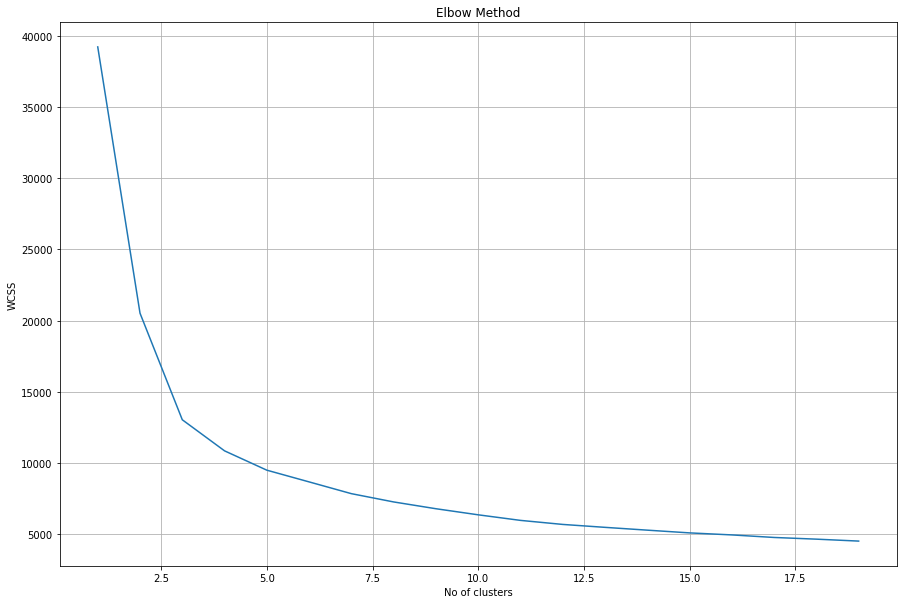

In [17]:
K = kaggle_features_cluster
K = K.iloc[:,[0,1,2, 3 ,4,5,6,7]].values
from sklearn.cluster import KMeans
wcss =[]
for j in range (1,20):
    kmeans = KMeans(n_clusters = j, init = 'k-means++', max_iter =100, n_init = 10, random_state = 0)
    kmeans.fit(K)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [18]:
kmeans = KMeans(n_clusters= 5, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
Kmeans = kmeans.fit_predict(K)
kaggle_features_cluster["Kmean_Clusters"] = Kmeans

In [19]:
cluster1 = cluster2 = cluster0 = cluster3 = cluster4 = 0

for row in kaggle_features_cluster["Kmean_Clusters"]:
    if row == 1:
        cluster1 = cluster1 + 1
    elif row == 2:
        cluster2 = cluster2 + 1
    elif row == 3:
        cluster3 = cluster3 + 1
    elif row == 4:
        cluster4 = cluster4 + 1
    else:
        cluster0 = cluster0 + 1
print(cluster3)
Cluster = [cluster3, cluster0, cluster4, cluster2, cluster1]

6308


In [20]:
kaggle_features_cluster.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,global_subjectivity,global_rate_positive_words,rate_positive_words,rate_negative_words,title_subjectivity,Kmean_Clusters
0,2.833213,6.742881,0.426887,0.482216,0.024764,0.552632,0.447368,0.000000,0
1,2.197225,6.561031,0.521924,0.495110,0.032532,0.638889,0.361111,0.100000,0
2,2.079442,7.150701,0.443922,0.405107,0.032157,0.640625,0.359375,0.000000,3
3,2.397895,6.331502,0.444840,0.262625,0.021352,0.387097,0.612903,0.107143,0
4,2.708050,5.030438,0.640523,0.112500,0.000000,0.000000,1.000000,0.250000,4


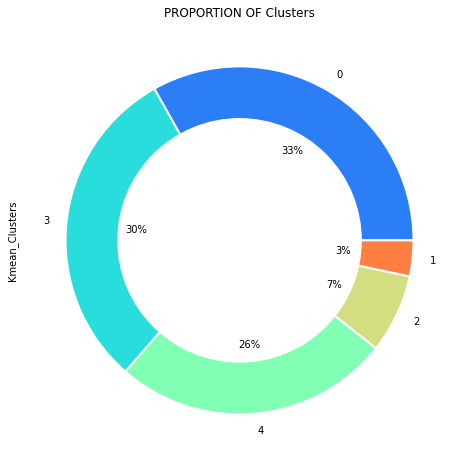

In [21]:
plt.figure(figsize=(8,8))
kaggle_features_cluster["Kmean_Clusters"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",5),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF Clusters")
plt.show()

In [22]:
kaggle_features_cluster.groupby(['Kmean_Clusters'])['n_tokens_title'].count()

Kmean_Clusters
0    6865
1     687
2    1517
3    6308
4    5333
Name: n_tokens_title, dtype: int64

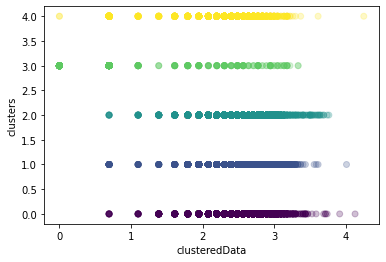

In [23]:
kmeans = KMeans(n_clusters=5)
clusteredData = kmeans.fit_predict(kaggle_features_cluster)
#plt.plot(figsize = (100,10000))
plt.xlabel('clusteredData')
plt.ylabel('clusters')
plt.scatter(kaggle_features_cluster.n_tokens_title,clusteredData, c= clusteredData, alpha=0.25) 
plt.show()

In [24]:

print((kaggle_features_cluster.iloc[list(np.where(clusteredData==0))[0],:]))
print((kaggle_features_cluster.iloc[list(np.where(clusteredData==1))[0],:]))
print((kaggle_features_cluster.iloc[list(np.where(clusteredData==2))[0],:]))
print((kaggle_features_cluster.iloc[list(np.where(clusteredData==3))[0],:]))

       n_tokens_title  n_tokens_content  n_unique_tokens  global_subjectivity  \
0            2.833213          6.742881         0.426887             0.482216   
1            2.197225          6.561031         0.521924             0.495110   
3            2.397895          6.331502         0.444840             0.262625   
6            2.944439          6.238325         0.531250             0.450635   
7            2.708050          6.728629         0.478469             0.382506   
...               ...               ...              ...                  ...   
20791        2.639057          6.077642         0.543578             0.443457   
20792        2.397895          6.373320         0.518771             0.483041   
20793        2.484907          6.411818         0.474548             0.467561   
20794        2.484907          6.063785         0.502326             0.410689   
20797        2.833213          6.723832         0.462740             0.466389   

       global_rate_positive

## KMeans on merged data

In [64]:
dataset_merged_cluster=dataset_merged.loc[:,['author','title','n_tokens_title','n_tokens_content','n_unique_tokens','global_subjectivity','global_rate_positive_words','rate_positive_words','rate_negative_words','title_subjectivity']]

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset_merged_cluster['author']=encoder.fit_transform(dataset_merged_cluster['author'].astype('str'))

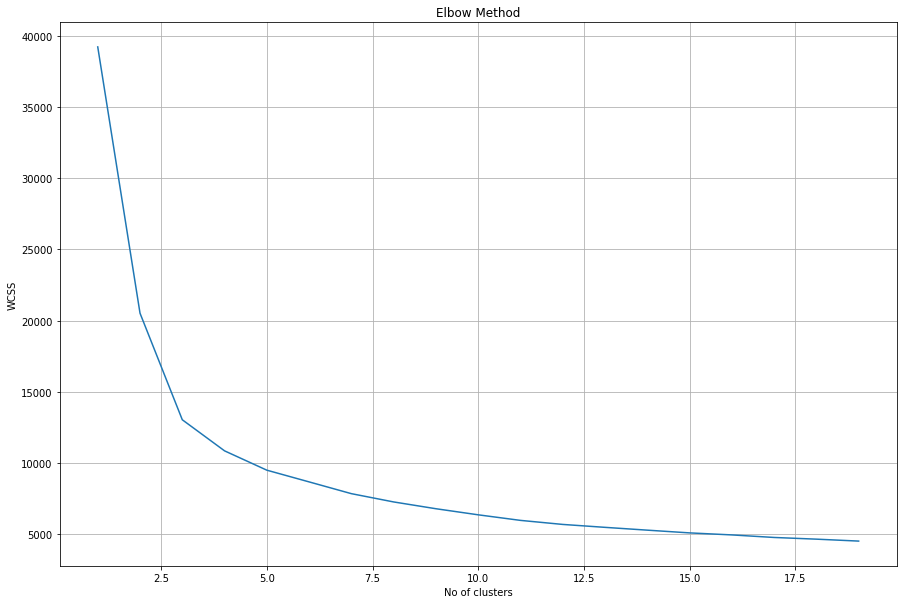

In [66]:
J = dataset_merged_cluster
J =J.iloc[:,[0,1,2, 3 ,4,5,6,7]].values
from sklearn.cluster import KMeans
wcss =[]
for j in range (1,20):
    kmeans = KMeans(n_clusters = j, init = 'k-means++', max_iter =100, n_init = 10, random_state = 0)
    kmeans.fit(K)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [68]:
dataset_merged_cluster['author'] = dataset_merged_cluster['author'].astype(str)
dataset_merged_cluster['title'] = dataset_merged_cluster['title'].astype(str)

In [69]:
kmeans = KMeans(n_clusters= 5, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
Kmeans = kmeans.fit_predict(J)
dataset_merged_cluster["Kmean_Clusters1"] = Kmeans

In [70]:
cluster1 = cluster2 = cluster0 = cluster3 = cluster4 = 0

for row in dataset_merged_cluster["Kmean_Clusters1"]:
    if row == 1:
        cluster1 = cluster1 + 1
    elif row == 2:
        cluster2 = cluster2 + 1
    elif row == 3:
        cluster3 = cluster3 + 1
    elif row == 4:
        cluster4 = cluster4 + 1
    else:
        cluster0 = cluster0 + 1
print(cluster3)
Cluster = [cluster3, cluster0, cluster4, cluster2, cluster1]

3691


In [71]:
dataset_merged_cluster.head()

,author,title,n_tokens_title,n_tokens_content,n_unique_tokens,global_subjectivity,global_rate_positive_words,rate_positive_words,rate_negative_words,title_subjectivity,Kmean_Clusters1
0,886,5001,2.833213,6.742881,0.426887,0.482216,0.024764,0.552632,0.447368,0.000000,1
1,857,3005,2.197225,6.561031,0.521924,0.495110,0.032532,0.638889,0.361111,0.100000,4
2,782,15333,2.079442,7.150701,0.443922,0.405107,0.032157,0.640625,0.359375,0.000000,3
3,1654,9098,2.397895,6.331502,0.444840,0.262625,0.021352,0.387097,0.612903,0.107143,2
4,1395,6039,2.708050,5.030438,0.640523,0.112500,0.000000,0.000000,1.000000,0.250000,1


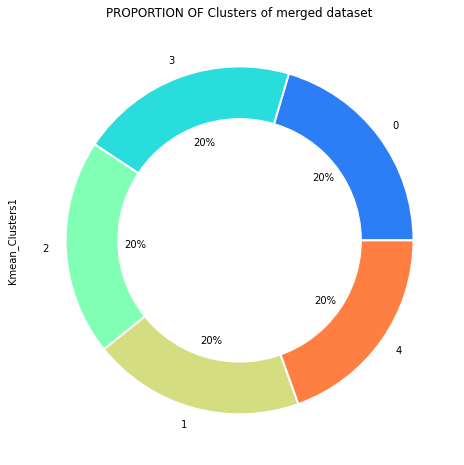

In [72]:
plt.figure(figsize=(8,8))
dataset_merged_cluster["Kmean_Clusters1"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",5),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF Clusters of merged dataset")
plt.show()

In [73]:
dataset_merged_cluster.groupby(['Kmean_Clusters1'])['n_tokens_title'].count()

Kmean_Clusters1
0    3719
1    3590
2    3658
3    3691
4    3553
Name: n_tokens_title, dtype: int64

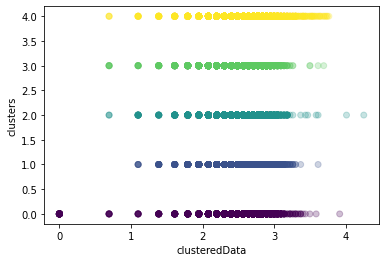

In [76]:
kmeans = KMeans(n_clusters=5)
clusteredData1 = kmeans.fit_predict(dataset_merged_cluster)
#plt.plot(figsize = (100,10000))
plt.xlabel('clusteredData')
plt.ylabel('clusters')
plt.scatter(dataset_merged_cluster.n_tokens_title,clusteredData1, c= clusteredData1, alpha=0.25) 
plt.show()

## K-means for merged dataset

In [46]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset_merged['text']=encoder.fit_transform(dataset_merged['text'].astype('str'))
dataset_merged['title']=encoder.fit_transform(dataset_merged['title'].astype('str'))
#dataset_merged['author']=encoder.fit_transform(dataset_merged['author'].astype('str'))

In [47]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(dataset_merged_cluster)

In [54]:
row_dict = []
for index, row in dataset_merged.iterrows():
        row_dict.append(row['author'])

In [55]:
clusternames = km.fit_predict(dataset_merged_cluster)
print(clusternames)
clusters = {}
n = 0
i=0
print(len(row_dict))
print(len(clusternames))
for author in clusternames:
        if author in clusters:
            if(row_dict[n] not in clusters[author]):
                clusters[author].append(row_dict[n])
                i=i+1
        else:
            clusters[author] = [row_dict[n]]
            i=i+1
        n +=1

[0 0 0 ... 3 2 0]
18211
18211


In [56]:
import random
for item in clusters:
    print ("News recommened from authors in Cluster ", item + 1)
    print("\n")
    n = 1
    print(random.sample(clusters[item], 20))
    print("\n")

News recommened from authors in Cluster  1


['Danny Haiphong', 'Geeta Anand and Hari Kumar', 'Europa-News', 'David Segal', 'Deborah Levy', 'Elisabeth Malkin and Alberto Arce', 'Is This What You Think They Would Look Like? Supposed Pictures of Real Extraterrestrials - New Earth Media', 'Dr. Marsha Coleman-Adebayo', 'Dave Alpert', 'Infowars Nightly News', 'Gretchen Morgenson and Geraldine Fabrikant', 'Daniel J. Flynn', 'Ian Buruma', 'Fred Tyrell', 'Felipe Villamor', 'Douglas Martin', 'Donald G. McNeil Jr. and Manny Fernandez', 'Doreen Carvajal', 'Good Summer Bugs! - BrendaWatson.com', 'Eli Rosenberg and Evan Gershkovich']


News recommened from authors in Cluster  5


['Lt. Gen. (Ret.) Jerry Boykin', 'Justin Puck', 'John Schwartz', 'James Glanz', 'Julie Turkewitz and Caitlin Dickerson', 'James Glanz and Rami Nazzal', 'Katrin Bennhold and Stephen Castle', 'Marc Santora, William K. Rashbaum, Al Baker and Adam Goldman', 'Josh Katz and Kevin Quealy', 'Krys Lee', 'Lambert Strether', 'Jim Yar

## DBScan clustering

In [57]:
kaggle_features_cluster.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,global_subjectivity,global_rate_positive_words,rate_positive_words,rate_negative_words,title_subjectivity,Kmean_Clusters
0,2.833213,6.742881,0.426887,0.482216,0.024764,0.552632,0.447368,0.000000,0
1,2.197225,6.561031,0.521924,0.495110,0.032532,0.638889,0.361111,0.100000,0
2,2.079442,7.150701,0.443922,0.405107,0.032157,0.640625,0.359375,0.000000,3
3,2.397895,6.331502,0.444840,0.262625,0.021352,0.387097,0.612903,0.107143,0
4,2.708050,5.030438,0.640523,0.112500,0.000000,0.000000,1.000000,0.250000,4


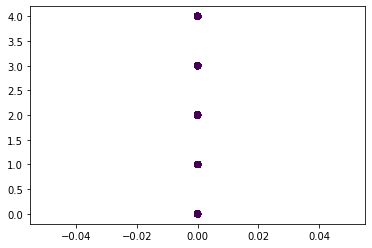

In [80]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=3, min_samples=1000)
clustering.fit(kaggle_features_cluster)

clusteredData2 = clustering.fit_predict(kaggle_features_cluster)
plt.scatter(clusteredData2,kaggle_features_cluster.Kmean_Clusters, c= clusteredData2)


In [59]:

kaggle_features_cluster['DBScanCluster']=clusteredData2 
kaggle_features_cluster

,n_tokens_title,n_tokens_content,n_unique_tokens,global_subjectivity,global_rate_positive_words,rate_positive_words,rate_negative_words,title_subjectivity,Kmean_Clusters,DBScanCluster
0,2.833213,6.742881,0.426887,0.482216,0.024764,0.552632,0.447368,0.000000,0,0
1,2.197225,6.561031,0.521924,0.495110,0.032532,0.638889,0.361111,0.100000,0,0
2,2.079442,7.150701,0.443922,0.405107,0.032157,0.640625,0.359375,0.000000,3,0
3,2.397895,6.331502,0.444840,0.262625,0.021352,0.387097,0.612903,0.107143,0,0
4,2.708050,5.030438,0.640523,0.112500,0.000000,0.000000,1.000000,0.250000,4,0
...,...,...,...,...,...,...,...,...,...,...
20795,2.397895,5.739793,0.601286,0.442076,0.016077,0.500000,0.500000,0.000000,4,0
20796,2.564949,7.024649,0.349644,0.413826,0.024911,0.538462,0.461538,0.454545,3,0
20797,2.833213,6.723832,0.462740,0.466389,0.036058,0.750000,0.250000,0.454545,0,0
20798,2.197225,5.620401,0.590580,0.209632,0.007246,0.200000,0.800000,0.000000,4,0


In [60]:
kaggle_features_cluster.groupby(['DBScanCluster'])['n_tokens_title'].count()

DBScanCluster
0    20710
Name: n_tokens_title, dtype: int64